In [1]:
# Author: Thiago Akio Nakamura
# E-mail: akionakas@gmail.com

# Import necessary classes and libraries
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from fdd import FDD
from sklearn.datasets import make_blobs
from time import time

In [2]:
# Create and display data set
n_samples = 1000
n_features = 10
centers = 3

x, y = make_blobs(n_samples=n_samples, 
                  n_features=n_features, 
                  centers=centers)
print 'Created {} samples wih {} features and {} centers.'.format(x.shape[0], x.shape[1], centers)

Created 1000 samples wih 10 features and 3 centers.


In [3]:
# 1
n_components=np.array([1, 2, 3, 4, 5, 6, 7, 8])
n_pc=np.array([1, 2, 3, 4, 5, 6, 7, 8])
covar_types=np.array([1, 2, 3, 4, 5, 6, 7, 8])
num_models = len(n_components) * len(n_pc) * len(covar_types)

n_jobs = np.array([1, 2, 4, 8, 16, 32, 64])
time_n_job = np.empty(0)

for n_job in n_jobs:
    fdd = FDD(name='TEPFDD',
              training_type='spark',
              n_components=n_components,
              n_pc=n_pc,
              covar_types=covar_types,
              n_jobs=n_job)
    start = time()
    _, _, _, _, id, is_new = fdd.fdd(x)
    end = time()
    train_time = np.array([end - start])
    time_n_job = np.concatenate((time_n_job, train_time), axis=0)
    print '     {} models trained in {} seconds with {} jobs.'.format(num_models, end - start, n_job)
    print '     n_componets'
    print n_components
    print '     n_pc'
    print n_pc
    print '     covar_types'
    print covar_types

There is no model registered, creating a normal one.
     512 models trained in 161.222440004 seconds with 1 jobs.
     n_componets
[1 2 3 4 5 6 7 8]
     n_pc
[1 2 3 4 5 6 7 8]
     covar_types
[1 2 3 4 5 6 7 8]
There is no model registered, creating a normal one.
     512 models trained in 104.314220905 seconds with 2 jobs.
     n_componets
[1 2 3 4 5 6 7 8]
     n_pc
[1 2 3 4 5 6 7 8]
     covar_types
[1 2 3 4 5 6 7 8]
There is no model registered, creating a normal one.
     512 models trained in 90.8359849453 seconds with 4 jobs.
     n_componets
[1 2 3 4 5 6 7 8]
     n_pc
[1 2 3 4 5 6 7 8]
     covar_types
[1 2 3 4 5 6 7 8]
There is no model registered, creating a normal one.
     512 models trained in 95.2325119972 seconds with 8 jobs.
     n_componets
[1 2 3 4 5 6 7 8]
     n_pc
[1 2 3 4 5 6 7 8]
     covar_types
[1 2 3 4 5 6 7 8]
There is no model registered, creating a normal one.
     512 models trained in 94.7911109924 seconds with 16 jobs.
     n_componets
[1 2 3 4 5 6 7 

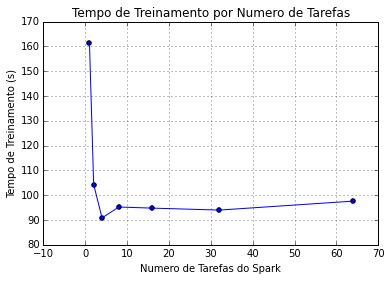

In [4]:
plt.plot(n_jobs, time_n_job)
plt.scatter(n_jobs, time_n_job)
plt.xlabel('Numero de Tarefas do Spark')
plt.ylabel('Tempo de Treinamento (s)')
plt.grid()
plt.title('Tempo de Treinamento por Numero de Tarefas')